In [ ]:
conda install -y -c conda-forge plotnine

# Visualization of datasets in Python

- matplotlib
    - matplotlib.org/gallery
- plotnine
- pandas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
surveys = pd.read_csv('../data/surveys.csv')

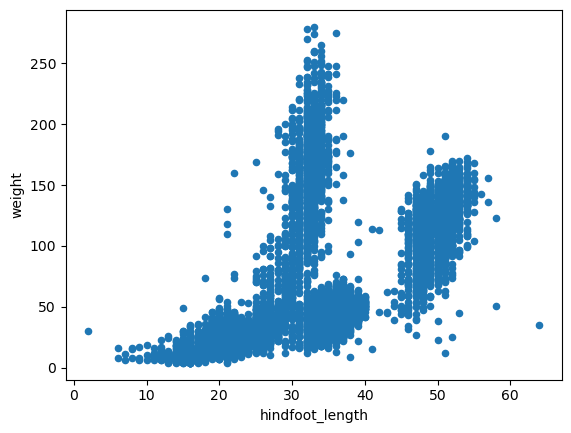

In [4]:
my_plot = surveys.plot('hindfoot_length', 'weight', kind='scatter')
#plt.show()

## matplotlib

In [5]:
import numpy as np

In [6]:
# create a normal distribution
sample_data = np.random.normal(0, 0.1, 1000)

(array([  5.,  21.,  83., 176., 251., 236., 159.,  52.,  13.,   4.]),
 array([-0.32353658, -0.25693857, -0.19034057, -0.12374256, -0.05714456,
         0.00945345,  0.07605146,  0.14264946,  0.20924747,  0.27584547,
         0.34244348]),
 <BarContainer object of 10 artists>)

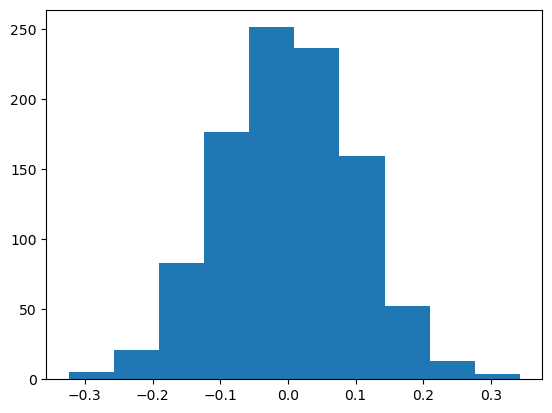

In [8]:
# create a histogram
plt.hist(sample_data)

(array([  5.,  21.,  83., 176., 251., 236., 159.,  52.,  13.,   4.]),
 array([-0.32353658, -0.25693857, -0.19034057, -0.12374256, -0.05714456,
         0.00945345,  0.07605146,  0.14264946,  0.20924747,  0.27584547,
         0.34244348]),
 <BarContainer object of 10 artists>)

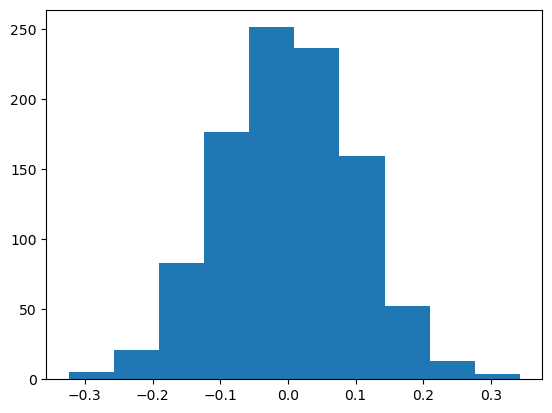

In [10]:
# figure, axes
fig, ax = plt.subplots()
ax.hist(sample_data)

In [13]:
beta = np.random.beta(5, 10, 1000)

fig, ax1 = plt.subplots()

ax1.hist(sample_data)
ax1.set_xlabel('value')

ax2 = fig.add_axes([0.125, 0.575, 0.3, 0.3])
ax2.hist(beta)

## Plotnine

### Grammar of Graphics

In [17]:
import plotnine as p9
import pandas as pd

In [18]:
surveys_cp = pd.read_csv('../data/surveys.csv')
surveys_cp = surveys_cp.dropna()

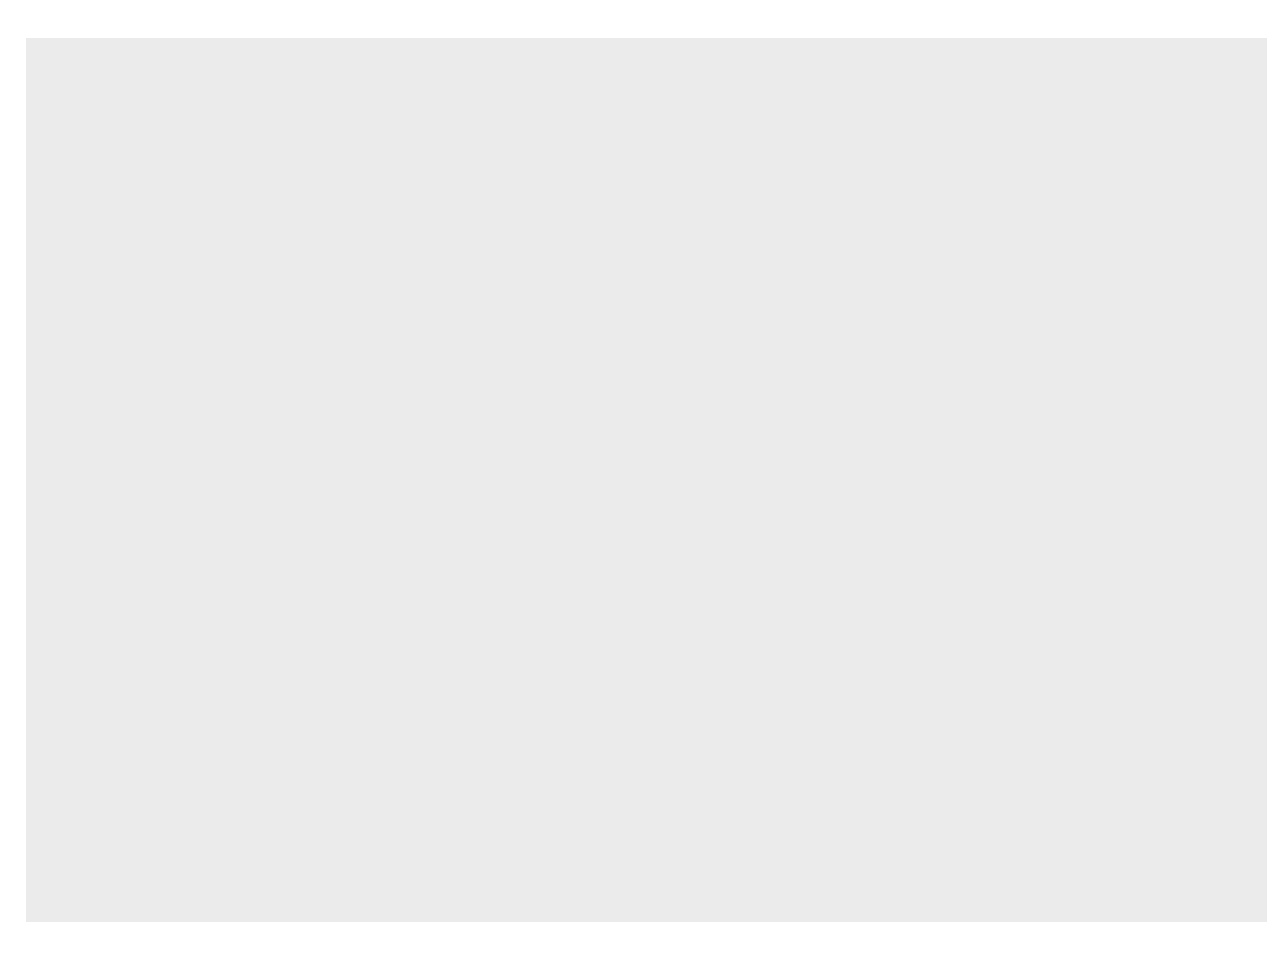

<Figure Size: (640 x 480)>

In [20]:
(
    p9.ggplot(data=surveys_cp)
)

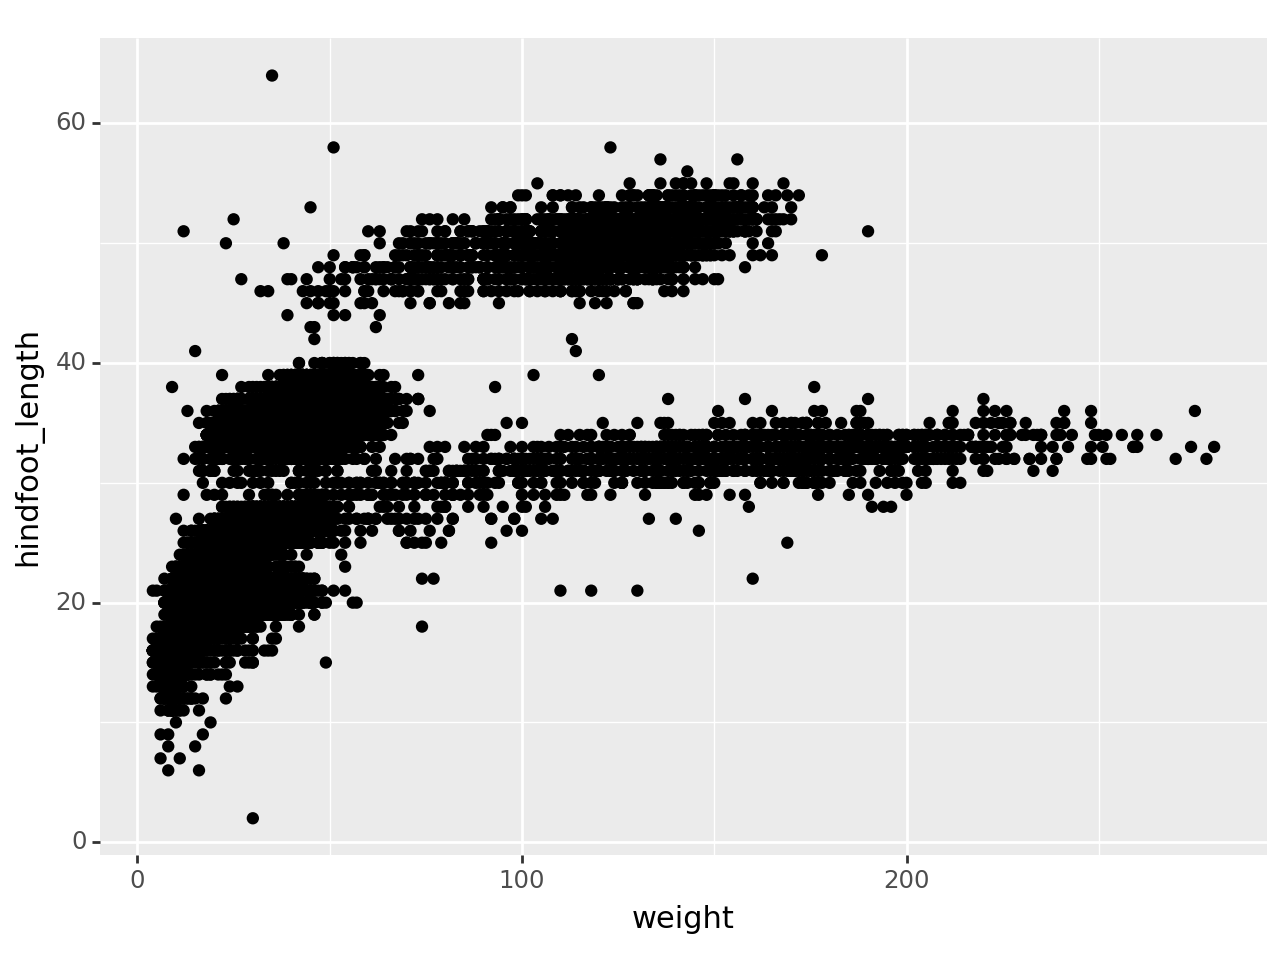

<Figure Size: (640 x 480)>

In [23]:
(
    p9.ggplot(data=surveys_cp, mapping=p9.aes(x='weight', y='hindfoot_length'))
    # adding geometry
    + p9.geom_point()
)